# <a href="https://concrete-web-bad.notion.site/SQL-d5462ca554014f1b9be3e6f78854750f">SQL</a>

## Описание проекта

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке, где есть база данных с информацией о книгах, издательствах, авторах, а также пользовательские обзоры книг.

Необходимо проанализировать базу данных и сформулировать ценностное предложение`*` для нового продукта.

`*` Ценностное предложение — обещание ценности, которое вы даете потенциальному клиенту, чтобы убедить его приобрести товар или услугу именно у вас.

## Загрузка библиотек

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt

pd.options.display.max_colwidth = 130

import warnings
warnings.simplefilter('ignore')

## Подключение к БД

In [3]:
# устанавливаем параметры

db_config = {'user': 'praktikum_student',                              # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp',                                  # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,                                             # порт подключения
             'db': 'data-analyst-final-project-db'}                    # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])

# сохраняем коннектор

con = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [4]:
# функция для отображения запроса SQL

def select(sql):
    
    ''' 
    Функция получает на вход SQL запрос и выводит результат
    '''
    
    return pd.read_sql(sql, con)

In [5]:
# функция для описательной статистики, вывода дубликатов и типов

def describe(data, datetime_as_num=True):
    
    ''' 
    Функция получает на ввод dataframe (data) и условие как выводить данные (dt_is_numeric) для datetime: 
    - True - для подсчетов статистики как int
    - False - для подсчетов статистики как object
    После поочередно выводит описательную статистику для каждого типа объекта 
    Дальше функция выводит количество и виды типов данных, количество явных дубликатов
    '''
    
    for t in data.dtypes.unique():
        print('{:=^50}'.format(f' dtype = {t}'))
        print(data.describe(include=t, datetime_is_numeric=datetime_as_num))
        print('='*50, end='\n\n')
    print(data.info())
    print('='*50, end='\n\n')
    print(f'Количество дубликатов {data.duplicated().sum()}')

## Схема БД

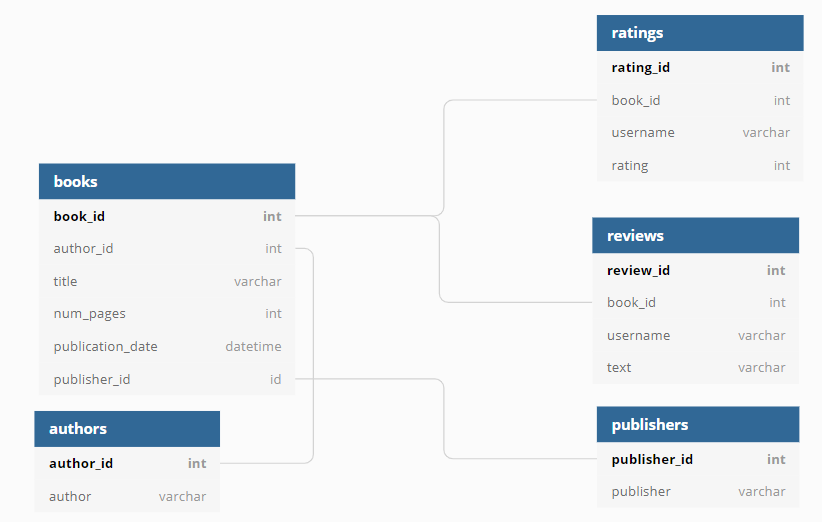

## Описание данных

### **Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

In [6]:
sql = ''' 

SELECT * 
FROM books
--LIMIT 10

''' 
books = select(sql)

select(sql).head(10)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


In [7]:
books['publication_date'] = pd.to_datetime(books['publication_date'], format = '%Y-%m-%d')

In [8]:
describe(books, False)

================== dtype = int64==================
           book_id    author_id   num_pages  publisher_id
count  1000.000000  1000.000000  1000.00000   1000.000000
mean    500.500000   320.417000   389.11100    171.270000
std     288.819436   181.620172   229.39014     99.082685
min       1.000000     1.000000    14.00000      1.000000
25%     250.750000   162.750000   249.00000     83.000000
50%     500.500000   316.500000   352.00000    177.500000
75%     750.250000   481.000000   453.00000    258.000000
max    1000.000000   636.000000  2690.00000    340.000000

================= dtype = object==================
                      title
count                  1000
unique                  999
top     Memoirs of a Geisha
freq                      2

============= dtype = datetime64[ns]==============
           publication_date
count                  1000
unique                  618
top     2006-08-29 00:00:00
freq                     10
first   1952-12-01 00:00:00
last    2020-03

<font color='orange'><b>*Наблюдение_*</b></font>

- пустых значений нет
- явных дубликатов нет
- столбец publication_date содержит неверный формат даты - в запросах будем использовать форматы дат (timestamp, date)
------------------------------------------
- book_id - все id уникальны, от 1 до 1000 (PK), а значит уникальных книг 999    
- author_id - всего авторов 636 (FK)  
- num_pages  - мин количество страниц - 14, максимально 2690 
- publisher_id - всего издателей 340 (FK) 
- title - одно название книги повторяется два раза, мб у нее разные авторы. всего уникальных названий - 999
- publication_date - в 2006-08-29 сделали больше всего публикаций

### **Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

In [9]:
sql = ''' 

SELECT * 
FROM authors
--LIMIT 10

''' 
authors = select(sql)

select(sql).head(10)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


In [10]:
describe(authors, False)

================== dtype = int64==================
        author_id
count  636.000000
mean   318.500000
std    183.741666
min      1.000000
25%    159.750000
50%    318.500000
75%    477.250000
max    636.000000

================= dtype = object==================
                 author
count               636
unique              636
top     Joseph J. Ellis
freq                  1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None

Количество дубликатов 0


<font color='orange'><b>*Наблюдение_*</b></font>

- пустых значений нет
- явных дубликатов нет

### **Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

In [11]:
sql = ''' 

SELECT * 
FROM publishers
--LIMIT 10

''' 
publishers = select(sql)

select(sql).head(10)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


In [12]:
describe(publishers, False)

================== dtype = int64==================
       publisher_id
count    340.000000
mean     170.500000
std       98.293777
min        1.000000
25%       85.750000
50%      170.500000
75%      255.250000
max      340.000000

================= dtype = object==================
       publisher
count        340
unique       340
top         Dell
freq           1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None

Количество дубликатов 0


<font color='orange'><b>*Наблюдение_*</b></font>

- пустых значений нет
- явных дубликатов нет

### **Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

In [13]:
sql = ''' 

SELECT * 
FROM ratings
--LIMIT 10

''' 
ratings = select(sql)

select(sql).head(10)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


In [14]:
describe(ratings, False)

================== dtype = int64==================
         rating_id      book_id       rating
count  6456.000000  6456.000000  6456.000000
mean   3228.500000   510.574195     3.928284
std    1863.831001   284.141636     0.943303
min       1.000000     1.000000     1.000000
25%    1614.750000   291.000000     3.000000
50%    3228.500000   506.000000     4.000000
75%    4842.250000   750.000000     5.000000
max    6456.000000  1000.000000     5.000000

================= dtype = object==================
       username
count      6456
unique      160
top      paul88
freq         56

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None

Количество ду

<font color='orange'><b>*Наблюдение_*</b></font>

- пустых значений нет
- явных дубликатов нет
------------------------------------------
 - rating_id - всего 6456 оценок (PK)
 - book_id - всего книг 999 (FK)   
 - rating - максимальный рейтинг 5, мин 1. Половина книг имеют рейтинг 4
 - username - paul88 давал чаще всего оценки

### **Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

In [15]:
sql = ''' 

SELECT * 
FROM reviews
--LIMIT 10

''' 

reviews = select(sql)

select(sql).head(10)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With personal where occur direction foot. Half sit role want.
7,8,4,abbottjames,Within enough mother. There at system full recent play recognize.
8,9,5,npowers,Thank now focus realize economy focus fly. Item step fine war. Western service history anything.
9,10,5,staylor,Game push lot reduce where remember. Including song travel hair foot. Director always myself past story chance reason.


In [16]:
describe(reviews, False)

================== dtype = int64==================
         review_id      book_id
count  2793.000000  2793.000000
mean   1397.000000   504.693161
std     806.413976   288.472931
min       1.000000     1.000000
25%     699.000000   259.000000
50%    1397.000000   505.000000
75%    2095.000000   753.000000
max    2793.000000  1000.000000

================= dtype = object==================
       username  \
count      2793   
unique      160   
top     susan85   
freq         29   

                                                                               text  
count                                                                          2793  
unique                                                                         2793  
top     Parent about able Mr however. Issue with inside among. Nothing visit eight.  
freq                                                                              1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data col

<font color='orange'><b>*Наблюдение_*</b></font>

- пустых значений нет
- явных дубликатов нет
------------------------------------------
- review_id - всего 2793 обзора (PK)   
- username - наибольшее число обзоров написал susan85 
- text - каждый текст обзора уникален, что означает, что среди пользователей нет ботов

### Вывод

Мы описали данные, выявили интересные моменты и увидели ключи, с помощью которых можно связать данные и точно описать данные в таблицах.  
Можем дальше работать с БД.

## Задания

### Задание 1

- Посчитайте, сколько книг вышло после 1 января 2000 года

In [25]:
sql = ''' 

SELECT date_trunc('month', NOW())


''' 

select(sql)

,date_trunc
0,2022-07-31 21:00:00+00:00


#### Вывод

> 819 книг опубликовали после 2000-01-01

### Задание 2

- Для каждой книги посчитайте количество обзоров и среднюю оценку

In [18]:
# вариант с CTE

sql = ''' 

WITH

cnt_rev_table AS    -- количество обзоров на книгу

(
    SELECT DISTINCT b.book_id, 
            title, 
            COUNT(rev.review_id) OVER (PARTITION BY b.book_id) AS cnt_rev
    FROM books b
    LEFT JOIN reviews rev ON b.book_id = rev.book_id  
    ORDER BY 3 DESC
),

mean_rat_table AS    -- средняя оценка по книгам

(
    SELECT DISTINCT b.book_id, 
            title, 
            ROUND(AVG(rating) OVER (PARTITION BY b.book_id), 1) AS avg_rat
    FROM books b
    JOIN ratings rat ON b.book_id = rat.book_id 
    ORDER BY 3 DESC
)

-- основной запрос

SELECT cr.book_id, 
    cr.title,  
    cnt_rev,
    avg_rat
FROM cnt_rev_table cr
JOIN mean_rat_table mr ON cr.book_id=mr.book_id
ORDER BY 3 DESC, 4 DESC

''' 

select(sql)

,book_id,title,cnt_rev,avg_rat
0,948,Twilight (Twilight #1),7,3.7
1,302,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.4
2,656,The Book Thief,6,4.3
3,299,Harry Potter and the Chamber of Secrets (Harry Potter #2),6,4.3
4,734,The Glass Castle,6,4.2
...,...,...,...,...
995,191,Disney's Beauty and the Beast (A Little Golden Book),0,4.0
996,387,Leonardo's Notebooks,0,4.0
997,221,Essential Tales and Poems,0,4.0
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.7


In [35]:
# вариант с оконной функцией

sql = ''' 

SELECT DISTINCT b.book_id, title, 
    COUNT(review_id) OVER (PARTITION BY title) AS cnt_rev,   
    ROUND(AVG(rating), 1) AS evg_rat
FROM books b
LEFT JOIN reviews rev ON b.book_id = rev.book_id
JOIN ratings rat ON b.book_id = rat.book_id
GROUP BY b.book_id, review_id
ORDER BY cnt_rev DESC, evg_rat DESC
    
''' 

select(sql)

,book_id,title,cnt_rev,evg_rat
0,426,Memoirs of a Geisha,8,4.2
1,427,Memoirs of a Geisha,8,3.7
2,948,Twilight (Twilight #1),7,3.7
3,302,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.4
4,299,Harry Potter and the Chamber of Secrets (Harry Potter #2),6,4.3
...,...,...,...,...
995,191,Disney's Beauty and the Beast (A Little Golden Book),0,4.0
996,221,Essential Tales and Poems,0,4.0
997,387,Leonardo's Notebooks,0,4.0
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.7


#### Вывод

> Максимальное количество обзоров на книгу - 7, средняя оценка около 4

### Задание 3

- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [22]:
sql = ''' 

SELECT DISTINCT publisher, 
    COUNT(book_id) OVER (PARTITION BY publisher) AS cnt_book
FROM publishers p
LEFT JOIN books b ON b.publisher_id=p.publisher_id
WHERE num_pages > 50
ORDER BY cnt_book DESC
LIMIT 1

''' 

select(sql)

,publisher,cnt_book
0,Penguin Books,42


In [23]:
# вариант с CTE

sql = ''' 

WITH

pages AS  -- таблица с издательствами, которые выпускали толстые книги чаще всего

(                  

    SELECT p.publisher_id, 
        publisher, 
        COUNT(book_id) AS cnt_book
    FROM publishers p
    LEFT JOIN books b ON b.publisher_id=p.publisher_id
    WHERE num_pages > 50
    GROUP BY 1, 2
    ORDER BY cnt_book DESC
    
)

-- основной запрос

SELECT publisher_id, 
       publisher 
FROM pages
LIMIT 1

''' 

select(sql)

,publisher_id,publisher
0,212,Penguin Books


#### Вывод

> Penguin Books - издательство, которое выпустило наибольшее число книг толще 50 страниц

### Задание 4

- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [25]:
# CTE

sql = ''' 

WITH 

book_table AS    -- таблица с id книг, где у них больше 50 оценок 

(
    SELECT b.book_id, 
           b.author_id 
    FROM books b
    LEFT JOIN ratings rat ON b.book_id = rat.book_id   
    GROUP BY b.book_id
    HAVING COUNT(rat.book_id) >= 50
),

table_rat as   -- таблица со средним рейтингом по авторам

(
    SELECT bt.author_id, 
           COUNT(r.book_id) as cnt_rat, 
           AVG(rating) as mean_rat
    FROM book_table as bt
    JOIN ratings r ON bt.book_id=r.book_id 
    GROUP BY 1
)

-- основной запрос

SELECT tr.author_id, 
       author, 
       cnt_rat, 
       ROUND(mean_rat, 2) mean_rat
FROM table_rat tr
JOIN authors a ON tr.author_id = a.author_id 
ORDER BY cnt_rat DESC, mean_rat DESC
LIMIT 1

''' 

select(sql)

,author_id,author,cnt_rat,mean_rat
0,236,J.K. Rowling/Mary GrandPré,310,4.29


In [27]:
# оконная и подзапрос

sql = ''' 

SELECT DISTINCT a.author_id, author,
    COUNT(rat.book_id) OVER (PARTITION BY author) cnt_rat,
    ROUND(AVG(rating) OVER (PARTITION BY author), 2) mean_rat
FROM 

(
    SELECT b.book_id,     -- выделяем книги, где 50 или болеее оценок
           b.author_id
    FROM books b
    LEFT JOIN ratings rat ON b.book_id = rat.book_id   
    GROUP BY b.book_id
    HAVING COUNT(rat.book_id) >= 50
    
) as b
    
LEFT JOIN authors a ON b.author_id = a.author_id   -- таблица с книгами
LEFT JOIN ratings rat ON b.book_id = rat.book_id   -- таблица с оценками
ORDER BY 3 DESC
LIMIT 1

''' 

select(sql)

,author_id,author,cnt_rat,mean_rat
0,236,J.K. Rowling/Mary GrandPré,310,4.29


In [34]:
# проверим данные - выведем сумму всех книг для J.K. Rowling/Mary GrandPré

sql = ''' 


SELECT b.book_id,     
        b.author_id, 
        COUNT(rat.book_id)
    FROM books b
    LEFT JOIN ratings rat ON b.book_id = rat.book_id   
    GROUP BY b.book_id
    HAVING COUNT(rat.book_id) >= 50 and title LIKE 'Little Women'
    

''' 

select(sql)

,book_id,author_id,count
0,399,376,52


In [25]:
# проверим данные - выведем сумму всех книг для J.K. Rowling/Mary GrandPré

sql = ''' 


SELECT SUM(count)
FROM 
(
    SELECT b.book_id,     
        b.author_id, 
        COUNT(rat.book_id)
    FROM books b
    LEFT JOIN ratings rat ON b.book_id = rat.book_id   
    GROUP BY b.book_id
    HAVING COUNT(rat.book_id) >= 50 and author_id = 236
) as a
    

''' 

select(sql)

,sum
0,310.0


#### Вывод

> J.K. Rowling - автор с самой высокой средней оценкой книг

### Задание 5

- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [26]:
sql = ''' 

WITH

cnt_re_table AS -- таблица с количеством обзоров по пользователям, оставивших больше 50 оценок

(
    SELECT username, 
        COUNT(review_id) AS cnt_rev
    FROM reviews
    GROUP BY username
    HAVING username IN (
        SELECT username   -- таблица с юзерами, которые оставили больше 50 оценок
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) > 50)
        )
        
-- основной запрос

SELECT AVG(cnt_rev)::int AS mean_rev
FROM cnt_re_table

''' 

select(sql)

,mean_rev
0,24


#### Вывод

> В среднем, активные пользователи оставляют 24 обзора

## Общий вывод и рекомендации

Наш ресурс был пополнен новыми книгами в количество 819 шт после 2000 года;  
Содержит книги с большим количеством обзоворов (до 7 шт) и высоки оценками (в среднем 4);  
В нашей библиоткеке есть много книг от знаменитых издательств - например Penguin Books;  
Книги есть от самы популрных авторов, таких как J.K. Rowling/Mary GrandPré, J.R.R. Tolkien и тд;  
В среднем, активные люди в нашем приложении оставляют 24 обзора  